In [1]:
import numpy as np
import pandas as pd
from typing import Tuple
import matplotlib.pyplot as plt

from scipy.signal import savgol_filter

In [2]:
def load_data(file_ids: list[str], time_steps: int=100, sliding_window:int=1, folder_path:str='MESWE-38/MESWE-38-processed/') -> Tuple[np.ndarray, np.ndarray]:
    """
    Load CSV files into separate DataFrames for training, validation and test.
    """

    numpy_data_x = []
    numpy_data_y = []

    for id in file_ids:
        file_path = f"../{folder_path}meswe_event_{id}.csv"
        df = pd.read_csv(file_path)
        cols = df.columns
        
        if "Timestamp" in cols:
            df = df.drop(["Timestamp"], axis=1) 

        # move dst to last col
        df['Dst'] = df.pop('Dst')
        
        df = df.dropna()
        
        data_X = df.to_numpy()
        #data_X, data_y = create_sequences(np_data, time_steps, sliding_window)
        numpy_data_x.append(data_X)
        #numpy_data_y.append(data_y)
    
    
    data_X_concated = np.concatenate(numpy_data_x, axis=0)
    #data_y_concated = np.concatenate(numpy_data_y, axis=0)

    return data_X_concated



## Smoothing

In [175]:
file_ids_train = [19, 6, 7, 8, 9, 11, 12, 13, 4, 15, 19, 21, 23, 25, 28, 29, 30, 31, 1, 10, 22, 17, 5, 13, 32, 33, 33, 34, 35, 36, 37, 38]
data = load_data(file_ids_train, time_steps=100, sliding_window=10)

In [176]:
data.shape

(45492, 13)

In [25]:
columns = ['Q1', 'Q2', 'Q3', 'Q4', 'N_CH', 'R_CH', 'S_CH', 'L_CH', 'C_CH', 'V_p', 'N_p', 'B_z', 'Dst']
real_data = pd.DataFrame(data, columns=columns)

smoothed_data = real_data.rolling(window=5, min_periods=1).mean()
smoothed_data_expo = real_data.ewm(alpha=0.2).mean()
smoothed_data_savgol = savgol_filter(real_data, window_length=5, polyorder=1, axis=0)
smoothed_data_savgol = pd.DataFrame(smoothed_data_savgol, columns=columns)

# Convert back to NumPy array
#smoothed_data = smoothed_data.to_numpy()

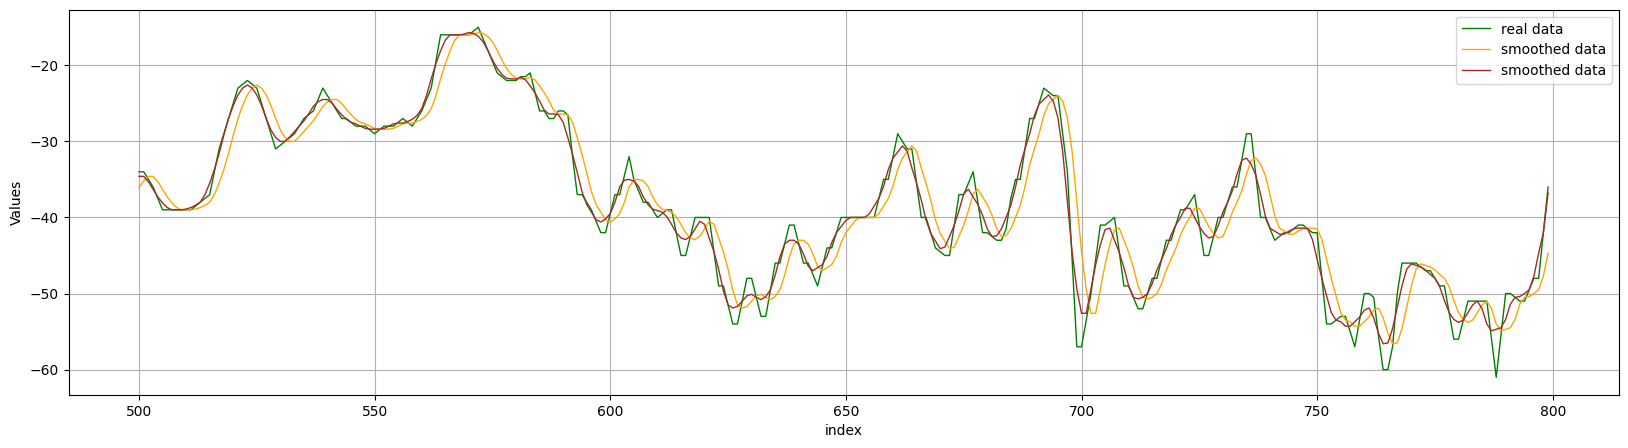

In [27]:
col_name = "Dst"
plt.figure(figsize=(20, 5))
plt.plot(real_data[col_name][500:800], label="real data", linewidth=1, color="green")
plt.plot(smoothed_data[col_name][500:800], label="smoothed data", color='orange', linewidth=1)
#plt.plot(smoothed_data_expo[col_name][500:800], label="smoothed data", color='purple', linewidth=1)
plt.plot(smoothed_data_savgol[col_name][500:800], label="smoothed data", color='brown', linewidth=1)

plt.legend()
plt.xlabel('index')
plt.ylabel('Values')
plt.grid(True)
plt.show()

## Adding noise

In [3]:
file_ids_train = [4, 19]
data = load_data(file_ids_train, time_steps=100, sliding_window=10)

In [4]:
data.shape

(1924, 13)

In [13]:
columns = ['Q1', 'Q2', 'Q3', 'Q4', 'N_CH', 'R_CH', 'S_CH', 'L_CH', 'C_CH', 'V_p', 'N_p', 'B_z', 'Dst']
real_data = pd.DataFrame(data, columns=columns)

smoothed_data = real_data.rolling(window=5).mean()
smoothed_data_expo = real_data.ewm(alpha=0.3).mean()
smoothed_data_savgol = savgol_filter(real_data, window_length=5, polyorder=1, axis=0)
smoothed_data_savgol = pd.DataFrame(smoothed_data_savgol, columns=columns)

noisy_data = (real_data - smoothed_data) + real_data
noisy_data_expo = (real_data - smoothed_data_expo) + real_data
noisy_data_savgol = (real_data - smoothed_data_savgol) + real_data

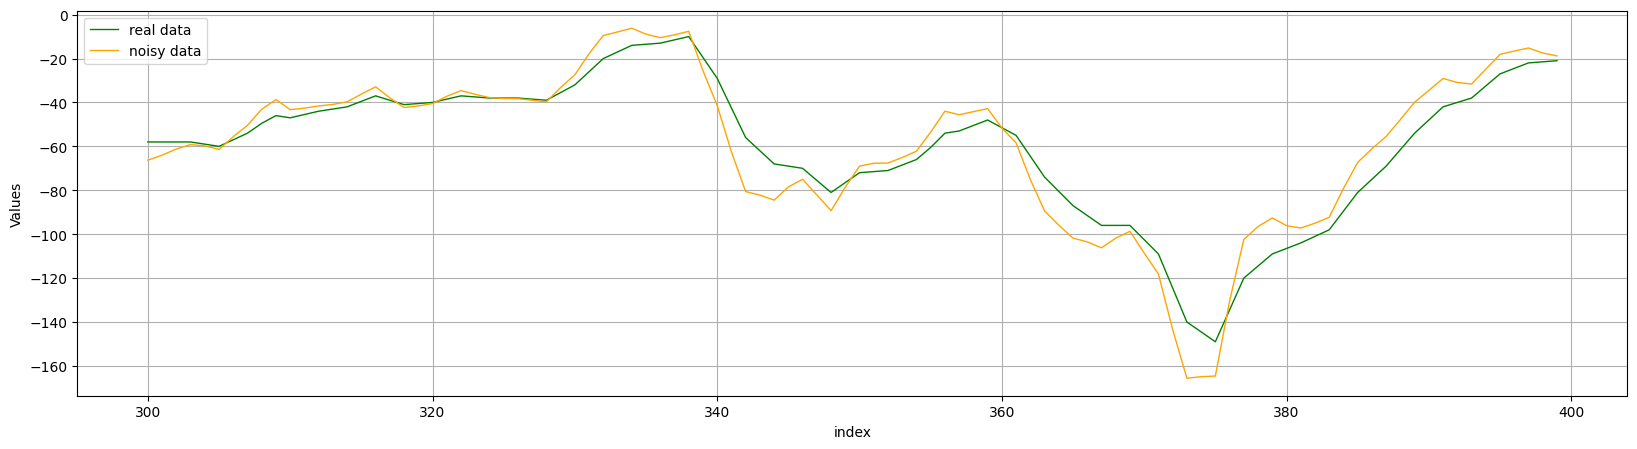

In [14]:
col_name = "Dst"
plt.figure(figsize=(20, 5))
plt.plot(real_data[col_name][300:400], label="real data", linewidth=1, color="green")
plt.plot(noisy_data[col_name][300:400], label="noisy data", color='orange', linewidth=1)
#plt.plot(noisy_data_expo[col_name][500:800], label="smoothed data", color='purple', linewidth=1)
#plt.plot(noisy_data_savgol[col_name][300:400], label="smoothed data", color='brown', linewidth=1)

plt.legend()
plt.xlabel('index')
plt.ylabel('Values')
plt.grid(True)
plt.show()

In [164]:
np.random.choice(32, 6, replace=False)

array([ 5,  0, 15, 29,  4,  9])

In [167]:
real_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1924 entries, 0 to 1923
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Q1      1924 non-null   float64
 1   Q2      1924 non-null   float64
 2   Q3      1924 non-null   float64
 3   Q4      1924 non-null   float64
 4   N_CH    1924 non-null   float64
 5   R_CH    1924 non-null   float64
 6   S_CH    1924 non-null   float64
 7   L_CH    1924 non-null   float64
 8   C_CH    1924 non-null   float64
 9   V_p     1924 non-null   float64
 10  N_p     1924 non-null   float64
 11  B_z     1924 non-null   float64
 12  Dst     1924 non-null   float64
dtypes: float64(13)
memory usage: 195.5 KB


In [173]:
type(real_data.values)

numpy.ndarray

In [1]:
import torch
device = torch.device('cpu')

In [2]:
print(device)

cpu
